In [1]:
import pickle
from sympy import *
from sympy.utilities.autowrap import autowrap
init_printing()

In [2]:
alpha, beta, gamma = symbols('alpha beta gamma')
alpha_d, beta_d, gamma_d = symbols('alpha_d beta_d gamma_d')
theta_1, theta_2, theta_3 = symbols('theta_1 theta_2 theta_3')
theta_1d, theta_2d, theta_3d = symbols('theta_1d theta_2d theta_3d')
ang_s = [alpha, beta, gamma]
omega_s = [alpha_d, beta_d, gamma_d]
theta = [theta_1, theta_2, theta_3]
theta_d = [theta_1d, theta_2d, theta_3d]
tau_1, tau_2 = symbols('tau_1 tau_2')
tau = Matrix([tau_1, tau_2])
Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = symbols('Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3')
m0, m1, m2, m3 = symbols('m0, m1, m2, m3')

In [3]:
states = Matrix([alpha, beta, gamma, theta_1, theta_2, theta_3, alpha_d, beta_d, gamma_d, theta_1d, theta_2d, theta_3d])
const = Matrix([Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, m0, m1, m2, m3])

In [4]:
with open('MassMat_sym.pickle', 'rb') as inM:
    MassMatrix = pickle.loads(inM.read())
with open('Corioli_sym.pickle', 'rb') as inC:
    CoriolisVector = pickle.loads(inC.read())
with open('Ls.pickle', 'rb') as LsR:
    Ls = pickle.loads(LsR.read())
with open('Lm.pickle', 'rb') as LmR:
    Lm = pickle.loads(LmR.read())
with open('Ls_d.pickle', 'rb') as LsdR:
    Ls_d = pickle.loads(LsdR.read())
with open('Lm_d.pickle', 'rb') as LmdR:
    Lm_d = pickle.loads(LmdR.read())

In [5]:
#MassMatrix[0, 0]

In [7]:
Mass_C = autowrap(MassMatrix, backend='cython', tempdir='./MassMatrix')
print('mass written')
Coriolis_C = autowrap(CoriolisVector, backend='cython', tempdir='./CoriolisVector')
print('corioli written')
Ls_C = autowrap(Ls, backend='cython', tempdir='./Ls')
print('Ls_C written')
Lm_C = autowrap(Lm, backend='cython', tempdir='./Lm')
Lsd_C = autowrap(Ls_d, backend='cython', tempdir='./Ls_derivative')
Lmd_C = autowrap(Lm_d, backend='cython', tempdir='./Lm_derivative')

mass written
corioli written
Ls_C written


In [29]:
y = MatrixSymbol('y', *states.shape)
cnst = MatrixSymbol('cnst', *const.shape)
state_array_map = dict(zip(states, y))
constant_map = dict(zip(const, cnst))
state_array_map, constant_map

In [31]:
M1 = MassMatrix.xreplace(state_array_map)
M2 = MassMatrix.xreplace(constant_map)
#M2[0, 0]

In [32]:
#msubs(M2[0,0], {alpha:0, beta:0, gamma:0, theta_1:0, theta_2:0, theta_3:0})

In [33]:
C1 = CoriolisVector.xreplace(state_array_map)
C2 = CoriolisVector.xreplace(constant_map)

In [34]:
from sympy.utilities.codegen import codegen
[(cf, cs), (hf, hs)] = codegen(('c_odes', M2), language='c')
print(cs)

/******************************************************************************
 *                       Code generated with sympy 1.3                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "c_odes.h"
#include <math.h>

void c_odes(double alpha, double beta, double gamma, double theta_1, double theta_2, double theta_3, double *out_1321357217866893144) {

   out_1321357217866893144[0] = 0.10000000000000001*pow(-(0.70710678118654757*sin(gamma)*cos(beta) + 0.70710678118654746*cos(beta)*cos(gamma))*sin(theta_1) - sin(beta)*cos(theta_1), 2) + 0.52000000000000002*pow((0.70710678118654757*sin(gamma)*cos(beta) + 0.707106

In [35]:
from sympy.utilities.autowrap import autowrap
Mass_C = autowrap(M2, backend='cython', tempdir='./MassMatrix')

In [36]:
Coriolis_C = autowrap(C2, backend='cython', tempdir='./CoriolisVector')

The structure of Mass and Coriolis matrices are as follows


from IPython.display import Latex
Latex(r"""\begin{align*}
Mass_C(\alpha, \beta, \gamma, \theta_1, \theta_2, \theta_3) \\
Coriolis_C(\alpha, \alpha_d, \beta, \beta_d, \gamma, \gamma_d, \theta_1, \theta_2, \theta_3,)
\end{align*}""")

In [42]:
#Mass_C(.1, .2, .3, .4, .5, .6)
#Coriolis_C(.1, .2, .3, .4, .5, .6, .7, .8, .9)

# Subexpression Elimination
```python
a = x*y + 5
b = x*y + 6
```

you can convert this to these three expressions:

```python
z = x*y
a = z + 5
b = z + 6
```

and `x*y` only has to be computed once.

The `cse()` function in SymPy returns the subexpression, `z = x*y`, and the simplified expressions: `a = z + 5`, `b = z + 6`.



In [44]:
sub_exprs, simplified_rhs = cse(M2)

In [45]:
for var, expr in sub_exprs:
    pprint(Eq(var, expr))

x₀ = sin(β)
x₁ = cos(θ₁)
x₂ = x₀⋅x₁
x₃ = sin(θ₁)
x₄ = sin(γ)
x₅ = cos(β)
x₆ = x₄⋅x₅
x₇ = 0.707106781186548⋅x₆
x₈ = cos(γ)
x₉ = x₅⋅x₈
x₁₀ = 0.707106781186547⋅x₉
x₁₁ = x₁₀ + x₇
x₁₂ = x₁₁⋅x₃
x₁₃ = x₁₂ + x₂
         2
x₁₄ = x₁₃ 
x₁₅ = x₀⋅x₃
x₁₆ = x₁⋅x₁₁
x₁₇ = -x₁₅ + x₁₆
x₁₈ = -x₁₂ - x₂
x₁₉ = -0.707106781186547⋅x₆ + 0.707106781186548⋅x₉
x₂₀ = cos(θ₂)
x₂₁ = sin(α)
x₂₂ = x₂₁⋅x₅
x₂₃ = x₂₂⋅x₃
x₂₄ = x₂₀⋅x₂₃
x₂₅ = -0.390625⋅x₂₄
x₂₆ = cos(α)
x₂₇ = x₂₆⋅x₄
x₂₈ = 0.725303396600249⋅x₂₇
x₂₉ = x₂₆⋅x₈
x₃₀ = 0.725303396600249⋅x₂₉
x₃₁ = x₂₁⋅x₈
x₃₂ = x₀⋅x₃₁
x₃₃ = x₂₁⋅x₄
x₃₄ = x₀⋅x₃₃
x₃₅ = x₂₈ + x₃₀ + 0.725303396600249⋅x₃₂ - 0.725303396600249⋅x₃₄
x₃₆ = x₂₅ + x₃₅
x₃₇ = 0.707106781186548⋅x₂₇
x₃₈ = 0.707106781186547⋅x₂₉
x₃₉ = 0.707106781186547⋅x₃₃
x₄₀ = 0.707106781186548⋅x₃₁
x₄₁ = -x₀⋅x₃₉ + x₀⋅x₄₀ + x₃₇ + x₃₈
x₄₂ = sin(θ₂)
x₄₃ = 1.25⋅x₄₂
x₄₄ = x₄₃ + 0.125
x₄₅ = x₄₁⋅x₄₄
x₄₆ = 0.3125⋅x₂₀
x₄₇ = 0.883883476483184⋅x₂₇
x₄₈ = 0.883883476483184⋅x₂₉
x₄₉ = 0.883883476483184⋅x₃₄
x₅₀ = 0.883883476483184⋅x₃₂
x₅₁ = x₁⋅(x₄₇ -

x₃₄₈ = x₁₁⋅x₂₀₈ + x₁₉⋅x₂₁₃ + 0.421875⋅x₃₂₆ + x₃₄₅ + x₃₄₆ + x₃₄₇
x₃₄₉ = 50.0⋅x₃₄₈
x₃₅₀ = -x₂₂₁⋅x₃₄₉ + x₃₄₁⋅x₃₄₂ + x₃₄₃⋅x₃₄₄
x₃₅₁ = x₂₁₉ + x₂₄ + x₄₁⋅x₄₂
x₃₅₂ = 0.25⋅x₂₄₂
x₃₅₃ = x₂₃⋅x₄₂
x₃₅₄ = x₂₀⋅x₄₁ - x₂₁₈⋅x₄₂ - x₃₅₃
x₃₅₅ = 0.26⋅x₂₅₈
x₃₅₆ = x₃₂₈ + x₃₄₇
x₃₅₇ = 50.0⋅x₃₅₆
x₃₅₈ = -x₂₄₉⋅x₃₅₇ + x₃₅₁⋅x₃₅₂ + x₃₅₄⋅x₃₅₅
x₃₅₉ = -x₂₂⋅x₃₄₀ - x₂₆₇⋅x₃₃₁ - x₂₆₈⋅x₃₃₅ + x₃₁₇⋅x₃₁₈ + x₃₁₉⋅x₃₂₀ + x₃₂₁⋅x₃₂₂ +
 x₃₂₃⋅x₄₁ + x₃₃₇⋅x₉ - x₃₃₉⋅x₆ + x₃₅₀ + x₃₅₈
x₃₆₀ = -x₂₇₄⋅x₄₁
x₃₆₁ = -x₅₂ + x₅₃ - x₅₅ - x₅₇
x₃₆₂ = -x₂₇₁⋅x₃₆₁
x₃₆₃ = -x₀⋅x₁₀₉ + x₀⋅x₁₁₀ + x₁₁₁ + x₁₁₂
x₃₆₄ = x₃₆₃⋅x₄₆
x₃₆₅ = -x₁⋅x₃₆₄ - x₂₇₉⋅x₃₆₁ + x₃₆₀ + x₃₆₂
x₃₆₆ = -x₀⋅x₁₁₉ - x₀⋅x₁₂₀ + x₁₂₁ - x₁₂₃
x₃₆₇ = x₃₆₅ + x₃₆₆
x₃₆₈ = -x₂₂₄⋅x₂₇₄
x₃₆₉ = -x₂₇₁⋅x₉₇
x₃₇₀ = x₀⋅x₄₇ - x₀⋅x₄₈ + x₂₉₆ + x₂₉₇
x₃₇₁ = x₃₇₀⋅x₄₆
x₃₇₂ = -x₁⋅x₃₇₁ - x₂₇₉⋅x₉₇ + x₃₆₈ + x₃₆₉
x₃₇₃ = x₀⋅x₂₈ + x₀⋅x₃₀ + x₂₈₉ - x₂₉₄
x₃₇₄ = x₃₇₂ + x₃₇₃
x₃₇₅ = x₁₄₆⋅x₃₆₃
x₃₇₆ = x₁⋅x₃₇₅ + x₃₀₃⋅x₃₆₁
x₃₇₇ = -x₁₃₈ - x₁₄₀ + x₁₄₃ + x₃₀₁⋅x₃₆₁ + x₃₀₂⋅x₄₁ + x₃₇₆
x₃₇₈ = x₃₆₀ + x₃₆₂ + x₃₆₆ + x₃₇₆
x₃₇₉ = x₁₄₆⋅x₃₇₀
x₃₈₀ = x

x₆₄₉ = -25.0⋅x₁₄₉ - 25.0⋅x₁₅₁ + 25.0⋅x₁₅₄ + 25.0⋅x₃₆₁⋅x₅₁₁ + 25.0⋅x₄₁⋅x₅₁₂ + 2
5.0⋅x₆₄₈
x₆₅₀ = x₆₃₃ + x₆₃₄ + x₆₃₇ + x₆₄₈
x₆₅₁ = 25.0⋅x₆₅₀
x₆₅₂ = x₁₅₅⋅x₃₇₀
x₆₅₃ = x₁⋅x₆₅₂ + x₅₁₃⋅x₉₇
x₆₅₄ = 25.0⋅x₁₅₀ + 25.0⋅x₁₆₇ + 25.0⋅x₁₆₈ + 25.0⋅x₂₂₄⋅x₅₁₂ + 25.0⋅x₅₁₁⋅x₉₇ + 25
.0⋅x₆₅₃
x₆₅₅ = x₆₄₀ + x₆₄₁ + x₆₄₄ + x₆₅₃
x₆₅₆ = 25.0⋅x₆₅₅
x₆₅₇ = x₁₈₃ + x₁₉₄ + x₁₉₅ + x₆₃₆
x₆₅₈ = 100.0⋅x₆₅₇
x₆₅₉ = -x₁₈₂ - x₁₈₄ + x₁₈₇ + x₆₄₃
x₆₆₀ = 100.0⋅x₆₅₉
x₆₆₁ = -0.3125⋅x₅₆₈
x₆₆₂ = -0.3125⋅x₅₇₂
x₆₆₃ = -1.4506067932005⋅x₆ + x₆₆₁ + x₆₆₂ - 1.4506067932005⋅x₉
x₆₆₄ = x₅₇₆⋅x₈₈
x₆₆₅ = -x₁⋅x₆₆₄ - x₄₉₅⋅x₅₇₅
x₆₆₆ = x₆₆₃ + x₆₆₅
x₆₆₇ = 10.0⋅x₆₆₆
x₆₆₈ = x₁₅₅⋅x₅₇₆
x₆₆₉ = x₁⋅x₆₆₈ + x₅₁₃⋅x₅₇₅
x₆₇₀ = 42.1875⋅x₅₆₈ + 42.1875⋅x₅₇₂ - 31.8457524475965⋅x₆ + 25.0⋅x₆₆₉ - 31.8457
524475965⋅x₉
x₆₇₁ = x₆₆₃ + x₆₆₉
x₆₇₂ = 25.0⋅x₆₇₁
x₆₇₃ = 0.826169902096139⋅x₆ + x₆₆₁ + x₆₆₂ + x₆₆₅ + 0.826169902096139⋅x₉
x₆₇₄ = 100.0⋅x₆₇₃
           2
x₆₇₅ = x₃₈₇ 
                       2            2       
x₆₇₆ = x₂₂₂ + 0.25⋅x₃₉₂  + 0.26⋅x₃₉₃  + x₅₆₃
                   

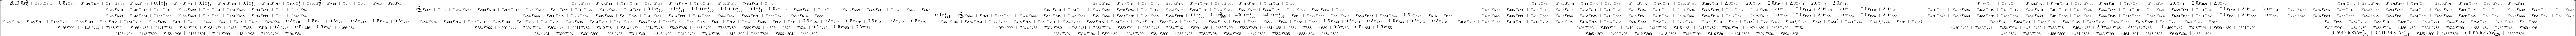

In [47]:
simplified_rhs[0]